# Random Walk Generation

In [50]:
import numpy as np
import pandas as pd

def gbm(n_years = 10, n_scenarios = 1000, mu=0.07, sigma = 0.15, steps_per_year = 12, s_0 = 100.0):
    """
    Evolution of Stock Price using a Geometric Brownian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years * steps_per_year)
    xi = np.random.normal(size = (n_steps, n_scenarios))
    rets = mu * dt + sigma * np.sqrt(dt) * xi
    rets = pd.DataFrame(rets)
    # to prices?
    prices = s_0 * (1+rets).cumprod()
    return prices

In [51]:
p = gbm(10, n_scenarios=3)

In [52]:
p.shape

(120, 3)

In [53]:
p.head()

,0,1,2
0,106.533256,100.004523,101.819377
1,112.272418,105.436322,100.436336
2,110.463070,105.107454,100.455644
3,104.739593,108.638625,98.789924
4,102.437761,103.965274,102.915777


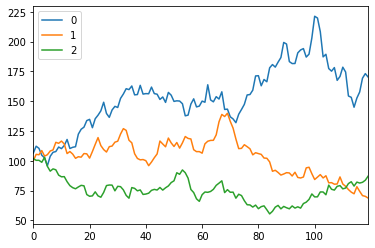

In [54]:
p.plot()

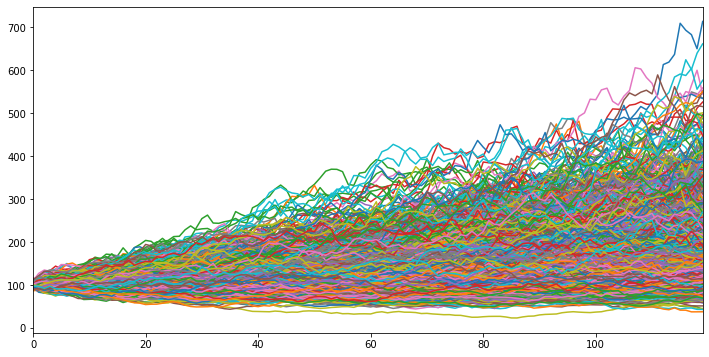

In [56]:
p = gbm(n_years = 10, n_scenarios=1000).plot(figsize=(12,6), legend=False)

In [67]:
# More eficient

import numpy as np
import pandas as pd

def gbm1(n_years = 10, n_scenarios = 1000, mu=0.07, sigma = 0.15, steps_per_year = 12, s_0 = 100.0):
    """
    Evolution of Stock Price using a Geometric Brownian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years * steps_per_year)
    rets_plus_1 = np.random.normal(loc=(1+mu*dt), scale=(sigma*np.sqrt(dt)), size=(n_steps+1, n_scenarios))
    rets_plus_1[0]=1
    # to prices?
    prices = s_0 * pd.DataFrame(rets_plus_1).cumprod()
    return prices

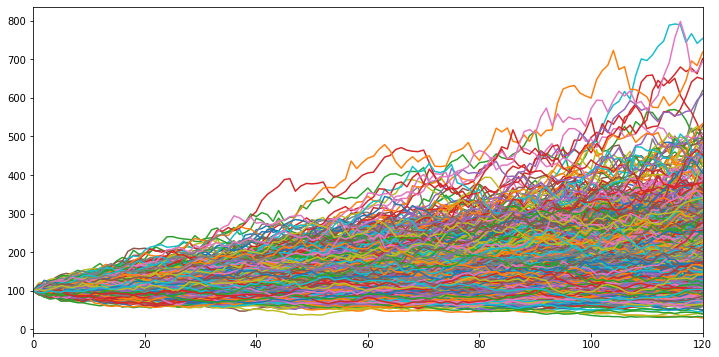

In [68]:
p = gbm1(n_years = 10, n_scenarios=1000).plot(figsize=(12,6), legend=False)

In [63]:
%timeit gbm(n_years = 10, n_scenarios=1000)

390 ms ± 5.14 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [64]:
%timeit gbm1(n_years = 10, n_scenarios=1000)

194 ms ± 3.92 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


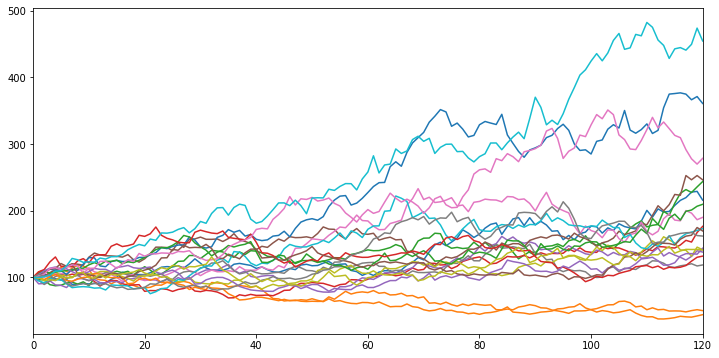

In [69]:
gbm1(n_years=10, n_scenarios=20).plot(legend=False, figsize=(12,6))

In [71]:
gbm1(n_scenarios=10).head()

,0,1,2,3,4,5,6,7,8,9
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,104.178886,106.371606,96.489106,104.052506,98.613318,94.320544,106.911510,103.789654,96.836766,103.533863
2,104.067592,106.017928,106.787685,111.527359,92.621274,92.958263,112.822298,99.772561,99.472572,99.421440
3,96.242104,112.976108,106.380972,111.862016,86.675923,92.880599,112.736990,106.745541,106.472228,99.027384
4,98.579640,114.011876,115.189978,114.438447,85.430096,95.667430,107.436013,112.612019,110.924458,96.859774
